In [1]:
import pandas as pd
import os

In [47]:
import pickle

In [2]:
smart_df = pd.read_csv('joint_clean_data/smart.csv', index_col=0)

In [3]:
smart_df.head()

,goal_id,goal_domain_original,goal_name_type_original,goal_domain_LoW,goal_name_type_LoW,goal_domain_no_noise,goal_name_type_no_noise,goal_domain_mean_pos,goal_name_type_mean_pos,remove,...,goal_aver_word_len,goal_verbs_counter,goal_nouns_counter,goal_numr_counter,goal_adj_counter,goal_digit_counter,label_specific,label_attainable,label_time_bound,label_unambiguity
0,19,творчество и создание нового изобразительное и...,не отстать от поезда современности получить зн...,"['творчество', 'и', 'создание', 'нового', 'изо...","['не', 'отстать', 'от', 'поезда', 'современнос...",творчество создание новое изобразительный иску...,отстать поезд современность получить знание но...,творчество создание новое изобразительный иску...,отстать поезд современность получить знание но...,0,...,5.62,6,12,0,3,0,0,1,1,1
1,20,универсальные компетенции гибкие навыки soft ...,самореализация получить знания в новой области...,"['универсальные', 'компетенции', '', 'гибкие',...","['самореализация', 'получить', 'знания', 'в', ...",универсальный компетенция гибкий навык soft s...,самореализация получить знание новый область ...,универсальный компетенция гибкий навык навык о...,самореализация получить знание новый область п...,0,...,5.92,5,10,0,2,0,0,1,1,1
2,21,иностранные языки гуманитарные знания и навык...,улучшенный образ жизни включиться в новый прое...,"['иностранные', 'языки', '', 'гуманитарные', '...","['улучшенный', 'образ', 'жизни', 'включиться',...",иностранный язык гуманитарный знание навык ин...,улучшить образ жизнь включиться новый проект д...,иностранный язык гуманитарный знание навык ино...,образ жизнь включиться новый проект деятельность,0,...,6.75,1,4,0,1,0,1,0,0,0
3,22,прикладные знания и навыки ручной труд информ...,обновление устаревшей информации развить имеющ...,"['прикладные', 'знания', 'и', 'навыки', '', 'р...","['обновление', 'устаревшей', 'информации', 'ра...",прикладной знание навык ручной труд информаци...,обновление устаревший информация развить иметь...,прикладной знание навык ручной труд информация...,обновление устаревший информация развить знани...,0,...,7.38,1,4,0,1,0,1,1,1,1
4,23,универсальные компетенции гибкие навыки soft ...,повышение результативности труда получить знан...,"['универсальные', 'компетенции', '', 'гибкие',...","['повышение', 'результативности', 'труда', 'по...",универсальный компетенция гибкий навык soft s...,повышение результативность труд получить знани...,универсальный компетенция гибкий навык планиро...,повышение результативность труд получить знани...,0,...,5.69,5,12,0,1,0,1,1,1,1


In [4]:
len(smart_df['goal_name_type_original'].unique())

15675

In [5]:
smart = smart_df.copy()

In [6]:
smart.drop(columns=['goal_id', 'goal_domain_original', 'goal_domain_LoW', 'goal_name_type_LoW',
                   'goal_domain_no_noise', 'goal_domain_mean_pos'], inplace=True)

In [7]:
smart = smart[smart['remove'] == 0]

In [8]:
smart.drop(columns=['remove'], inplace=True)

In [9]:
smart.head()

,goal_name_type_original,goal_name_type_no_noise,goal_name_type_mean_pos,are_first_steps_known,is_time_certain,is_certainly_imagined,are_obstackles_expected,topic_words,goal_words,topic_letters,...,goal_aver_word_len,goal_verbs_counter,goal_nouns_counter,goal_numr_counter,goal_adj_counter,goal_digit_counter,label_specific,label_attainable,label_time_bound,label_unambiguity
0,не отстать от поезда современности получить зн...,отстать поезд современность получить знание но...,отстать поезд современность получить знание но...,0,0,1,0,19,32,121,...,5.62,6,12,0,3,0,0,1,1,1
1,самореализация получить знания в новой области...,самореализация получить знание новый область ...,самореализация получить знание новый область п...,0,0,1,0,79,24,435,...,5.92,5,10,0,2,0,0,1,1,1
2,улучшенный образ жизни включиться в новый прое...,улучшить образ жизнь включиться новый проект д...,образ жизнь включиться новый проект деятельность,1,0,1,0,25,8,171,...,6.75,1,4,0,1,0,1,0,0,0
3,обновление устаревшей информации развить имеющ...,обновление устаревший информация развить иметь...,обновление устаревший информация развить знани...,1,0,1,0,19,8,106,...,7.38,1,4,0,1,0,1,1,1,1
4,повышение результативности труда получить знан...,повышение результативность труд получить знани...,повышение результативность труд получить знани...,1,0,1,0,20,26,134,...,5.69,5,12,0,1,0,1,1,1,1


In [10]:
smart_text_vectors = smart[['goal_name_type_original', 'goal_name_type_no_noise', 'goal_name_type_mean_pos',
                           'label_specific', 'label_attainable', 'label_time_bound']]
smart_features = smart.drop(columns=['goal_name_type_original', 'goal_name_type_no_noise', 'goal_name_type_mean_pos'])

In [11]:
smart_features.head()

,are_first_steps_known,is_time_certain,is_certainly_imagined,are_obstackles_expected,topic_words,goal_words,topic_letters,goal_letters,topic_aver_word_len,goal_aver_word_len,goal_verbs_counter,goal_nouns_counter,goal_numr_counter,goal_adj_counter,goal_digit_counter,label_specific,label_attainable,label_time_bound,label_unambiguity
0,0,0,1,0,19,32,121,180,6.37,5.62,6,12,0,3,0,0,1,1,1
1,0,0,1,0,79,24,435,142,5.51,5.92,5,10,0,2,0,0,1,1,1
2,1,0,1,0,25,8,171,54,6.84,6.75,1,4,0,1,0,1,0,0,0
3,1,0,1,0,19,8,106,59,5.58,7.38,1,4,0,1,0,1,1,1,1
4,1,0,1,0,20,26,134,148,6.70,5.69,5,12,0,1,0,1,1,1,1


In [12]:
smart_text_vectors.head()

,goal_name_type_original,goal_name_type_no_noise,goal_name_type_mean_pos,label_specific,label_attainable,label_time_bound
0,не отстать от поезда современности получить зн...,отстать поезд современность получить знание но...,отстать поезд современность получить знание но...,0,1,1
1,самореализация получить знания в новой области...,самореализация получить знание новый область ...,самореализация получить знание новый область п...,0,1,1
2,улучшенный образ жизни включиться в новый прое...,улучшить образ жизнь включиться новый проект д...,образ жизнь включиться новый проект деятельность,1,0,0
3,обновление устаревшей информации развить имеющ...,обновление устаревший информация развить иметь...,обновление устаревший информация развить знани...,1,1,1
4,повышение результативности труда получить знан...,повышение результативность труд получить знани...,повышение результативность труд получить знани...,1,1,1


In [13]:
from sklearn.model_selection import train_test_split

### Label specific

#### Features approach

In [14]:
specific_features = smart_features.drop(columns=['label_attainable', 'label_time_bound', 'label_unambiguity'])

In [15]:
X = specific_features.drop('label_specific', axis=1)
y = specific_features['label_specific']

In [16]:
X.shape

(18018, 15)

In [17]:
y.shape

(18018,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.head()

,are_first_steps_known,is_time_certain,is_certainly_imagined,are_obstackles_expected,topic_words,goal_words,topic_letters,goal_letters,topic_aver_word_len,goal_aver_word_len,goal_verbs_counter,goal_nouns_counter,goal_numr_counter,goal_adj_counter,goal_digit_counter
12859,0,0,1,1,22,16,138,88,6.27,5.50,4,5,0,2,0
15493,1,0,1,1,21,24,120,132,5.71,5.50,5,10,0,1,0
1957,0,0,0,0,26,12,148,70,5.69,5.83,2,5,0,1,0
10928,1,0,1,1,15,16,95,99,6.33,6.19,3,7,0,2,0
17106,1,0,1,1,17,46,109,245,6.41,5.33,8,16,0,4,0


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
mms = MinMaxScaler()

In [22]:
X_train_scaled = mms.fit_transform(X_train)

In [23]:
X_train_scaled

array([[0.        , 0.        , 1.        , ..., 0.        , 0.07407407,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.03703704,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03703704,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.14814815,
        0.2       ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.07407407,
        0.        ]])

In [24]:
X_test_scaled = mms.fit_transform(X_test)

In [25]:
# !pip install xgboost

In [26]:
from xgboost import XGBClassifier

In [27]:
spec_xgb = XGBClassifier()

In [28]:
spec_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_pred = spec_xgb.predict(X_test_scaled)

In [45]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.80      0.70      2208
           1       0.39      0.20      0.26      1396

    accuracy                           0.57      3604
   macro avg       0.50      0.50      0.48      3604
weighted avg       0.53      0.57      0.53      3604



In [32]:
accuracy_score(y_test, y_pred)

0.5682574916759157

In [49]:
with open('models/specific_feat_xgb.pkl', 'wb') as f:
    pickle.dump(spec_xgb, f)

In [46]:
# f1_score(y_test, y_pred)

0.26045627376425856

In [33]:
# from sklearn.ensemble import RandomForestClassifier

In [34]:
# spec_rfc = RandomForestClassifier()

In [35]:
# spec_rfc.fit(X_train_scaled, y_train)

In [36]:
# y_pred = spec_rfc.predict(X_test_scaled)

In [37]:
# print(classification_report(y_test, y_pred))

In [38]:
# accuracy_score(y_test, y_pred)

In [39]:
# from sklearn.svm import LinearSVC

In [40]:
# spec_svd = LinearSVC()

In [41]:
# spec_svd.fit(X_train_scaled, y_train)

In [42]:
# y_pred = spec_svd.predict(X_test_scaled)

In [43]:
# print(classification_report(y_test, y_pred))

In [44]:
# accuracy_score(y_test, y_pred)

#### Vectors approach

In [50]:
specific_vectors = smart_text_vectors.drop(columns=['label_attainable', 'label_time_bound'])

In [51]:
specific_vectors.dropna(inplace=True)

In [52]:
specific_vectors.columns

Index(['goal_name_type_original', 'goal_name_type_no_noise',
       'goal_name_type_mean_pos', 'label_specific'],
      dtype='object')

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [54]:
text = specific_vectors['goal_name_type_mean_pos']
y = specific_vectors['label_specific']

In [55]:
text

0        отстать поезд современность получить знание но...
1        самореализация получить знание новый область п...
2         образ жизнь включиться новый проект деятельность
3        обновление устаревший информация развить знани...
4        повышение результативность труд получить знани...
                               ...                        
18013    приобретение новый знание навык успешный обуче...
18014    быть нужный работодатель приобрести новое навы...
18016    сохранить здоровье изменить привычка получить ...
18018    зарабатывать деньга получить знание новый обла...
18019    получение навык приобрести новое навык развить...
Name: goal_name_type_mean_pos, Length: 17106, dtype: object

In [56]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [57]:
X.shape

(17106, 4932)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [59]:
X_train

<13684x4932 sparse matrix of type '<class 'numpy.float64'>'
	with 167949 stored elements in Compressed Sparse Row format>

In [60]:
spec_v_xgb = XGBClassifier()

In [61]:
spec_v_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred = spec_v_xgb.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.88      0.72      2042
           1       0.45      0.14      0.21      1380

    accuracy                           0.58      3422
   macro avg       0.53      0.51      0.47      3422
weighted avg       0.54      0.58      0.51      3422



In [64]:
accuracy_score(y_test, y_pred)

0.5841613091759205

1. original accuracy = 0.57
2. no noise accuracy = 0.57
3. lean = 0.58

In [65]:
with open('models/specific_vect_xgb.pkl', 'wb') as f:
    pickle.dump(spec_v_xgb, f)

#### Neural net approach

In [66]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

In [67]:
text = specific_vectors['goal_name_type_mean_pos']
y = specific_vectors['label_specific']

In [68]:
token = Tokenizer()
token.fit_on_texts(text)

In [69]:
vocab_size = len(token.word_index) + 1
vocab_size

4948

In [70]:
print(token.word_index)

{'знание': 1, 'навык': 2, 'новое': 3, 'новый': 4, 'получить': 5, 'включиться': 6, 'развить': 7, 'приобрести': 8, 'область': 9, 'деятельность': 10, 'связь': 11, 'сообщество': 12, 'проект': 13, 'наработать': 14, 'образование': 15, 'диплом': 16, 'официальный': 17, 'изменить': 18, 'привычка': 19, 'свой': 20, 'быть': 21, 'развитие': 22, 'профессиональный': 23, 'работа': 24, 'повышение': 25, 'уровень': 26, 'стать': 27, 'язык': 28, 'получение': 29, 'компетенция': 30, 'научиться': 31, 'рост': 32, 'сфера': 33, 'английский': 34, 'повысить': 35, 'жизнь': 36, 'технология': 37, 'который': 38, 'найти': 39, 'человек': 40, 'расширение': 41, 'узнать': 42, 'обучение': 43, 'выучить': 44, 'изучение': 45, 'умение': 46, 'кругозор': 47, 'высокий': 48, 'время': 49, 'хороший': 50, 'мой': 51, 'изучить': 52, 'курс': 53, 'закончить': 54, 'специалист': 55, 'цель': 56, 'саморазвитие': 57, 'возможность': 58, 'хотеть': 59, 'профессия': 60, 'интересный': 61, 'карьерный': 62, 'квалификация': 63, 'современный': 64, 'мир

In [71]:
encoded_text = token.texts_to_sequences(text)

In [72]:
print(encoded_text)

[[533, 1860, 943, 5, 1, 4, 9, 8, 3, 2, 7, 1, 2, 6, 4, 13, 10, 5, 17, 15, 16], [94, 5, 1, 4, 9, 8, 3, 2, 6, 12, 14, 3, 11, 5, 17, 15, 16], [326, 36, 6, 4, 13, 10], [869, 1861, 77, 7, 1, 2], [25, 1043, 103, 5, 1, 4, 9, 8, 3, 2, 7, 1, 2, 6, 12, 14, 3, 11], [22, 23, 74, 2, 7, 1, 2], [5, 3, 1, 5, 1, 4, 9], [22, 23, 2, 5, 1, 4, 9, 8, 3, 2, 7, 1, 2, 6, 12, 14, 3, 11, 5, 17, 15, 16], [42, 3, 5, 1, 4, 9, 8, 3, 2, 7, 1, 2, 5, 17, 15, 16], [27, 646, 1862, 8, 3, 2, 6, 4, 13, 10], [2507, 1863, 37, 5, 1, 4, 9, 8, 3, 2, 7, 1, 2], [48, 15, 5, 17, 15, 16], [66, 1, 5, 1, 4, 9, 8, 3, 2, 7, 1, 2, 6, 4, 13, 10, 5, 17, 15, 16], [870, 5, 1, 4, 9, 8, 3, 2, 7, 1, 2], [25, 2508, 7, 1, 2], [2509, 1517, 18, 19], [76, 755, 56, 5, 1, 4, 9, 5, 17, 15, 16], [5, 15, 5, 1, 4, 9, 7, 1, 2, 5, 17, 15, 16], [39, 179, 258, 18, 19], [5, 3, 1, 7, 1, 2], [67, 1, 7, 1, 2, 5, 17, 15, 16], [1518, 18, 19, 5, 1, 4, 9, 8, 3, 2, 6, 12, 14, 3, 11], [25, 1, 18, 19, 5, 1, 4, 9, 8, 3, 2, 7, 1, 2, 6, 12, 14, 3, 11], [3, 1, 5, 1, 4, 9, 7, 

In [73]:
max_len = int()
for i in encoded_text:
    len_ = len(i)
    if len_ > max_len:
        max_len = len_
        
max_len

142

In [74]:
max_length = 142
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [75]:
print(X)

[[ 533 1860  943 ...    0    0    0]
 [  94    5    1 ...    0    0    0]
 [ 326   36    6 ...    0    0    0]
 ...
 [ 477  202   18 ...    0    0    0]
 [ 275  125    5 ...    0    0    0]
 [  29    2    8 ...    0    0    0]]


In [76]:
X.shape

(17106, 142)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [79]:
vec_size = 142

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(64, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 142, 142)          702616    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 141, 64)           18240     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 70, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 70, 64)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 70, 32)            2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 70, 32)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 70, 32)           

In [81]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Wall time: 35.9 ms


In [82]:
import numpy as np

In [83]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test= np.asarray(X_test)
y_test = np.asarray(y_test)

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [86]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 13684 samples, validate on 3422 samples
Epoch 1/600
13684/13684 [==============================] - 11s 797us/sample - loss: 0.6775 - accuracy: 0.5929 - val_loss: 0.6781 - val_accuracy: 0.5967
Epoch 2/600
13684/13684 [==============================] - 10s 705us/sample - loss: 0.6758 - accuracy: 0.5967 - val_loss: 0.6769 - val_accuracy: 0.5967
Epoch 3/600
13684/13684 [==============================] - 9s 675us/sample - loss: 0.6754 - accuracy: 0.5965 - val_loss: 0.6771 - val_accuracy: 0.5967
Epoch 4/600
13684/13684 [==============================] - 10s 749us/sample - loss: 0.6752 - accuracy: 0.5968 - val_loss: 0.6758 - val_accuracy: 0.5967
Epoch 5/600
13684/13684 [==============================] - 9s 663us/sample - loss: 0.6754 - accuracy: 0.5964 - val_loss: 0.6754 - val_accuracy: 0.5967
Epoch 6/600
13684/13684 [==============================] - 9s 629us/sample - loss: 0.6750 - accuracy: 0.5967 - val_loss: 0.6748 - val_accuracy: 0.5967
Epoch 7/600
13684/13684 [=================

In [87]:
losses = pd.DataFrame(model.history.history)

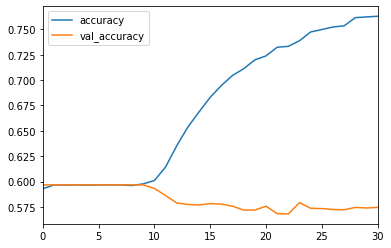

In [88]:
losses[['accuracy','val_accuracy']].plot()

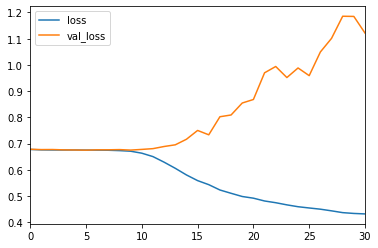

In [89]:
losses[['loss','val_loss']].plot()

In [90]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[1.1214471611622687, 0.57451785]


In [91]:
y_pred = model.predict_classes(X_test)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.85      0.70      2042
           1       0.43      0.17      0.24      1380

    accuracy                           0.57      3422
   macro avg       0.52      0.51      0.47      3422
weighted avg       0.53      0.57      0.52      3422



In [93]:
accuracy_score(y_test, y_pred)

0.5745178258328463

In [96]:
model.save("models/specific_vect_nn.h5")

### Label attainable

In [97]:
attainable_features = smart_features.drop(columns=['label_specific', 'label_time_bound', 'label_unambiguity'])

In [98]:
X = attainable_features.drop('label_attainable', axis=1)
y = attainable_features['label_attainable']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
mms = MinMaxScaler()

In [101]:
X_train_scaled = mms.fit_transform(X_train)

In [102]:
X_test_scaled = mms.fit_transform(X_test)

In [103]:
att_xgb = XGBClassifier()

In [104]:
att_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
y_pred = att_xgb.predict(X_test_scaled)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.23      0.30      1862
           1       0.59      0.79      0.68      2643

    accuracy                           0.56      4505
   macro avg       0.52      0.51      0.49      4505
weighted avg       0.53      0.56      0.52      4505



In [107]:
accuracy_score(y_test, y_pred)

0.5593784683684795

In [118]:
with open('models/attainable_feat_xgb.pkl', 'wb') as f:
    pickle.dump(att_xgb, f)

In [108]:
# att_rfc = RandomForestClassifier()

In [109]:
# att_rfc.fit(X_train_scaled, y_train)

In [110]:
# y_pred = att_rfc.predict(X_test_scaled)

In [111]:
# print(classification_report(y_test, y_pred))

In [112]:
# accuracy_score(y_test, y_pred)

In [113]:
# att_svd = LinearSVC()

In [114]:
# att_svd.fit(X_train_scaled, y_train)

In [115]:
# y_pred = att_svd.predict(X_test_scaled)

In [116]:
# print(classification_report(y_test, y_pred))

In [117]:
# accuracy_score(y_test, y_pred)

#### Vectors approach

In [119]:
attainable_vectors = smart_text_vectors.drop(columns=['label_specific', 'label_time_bound'])

In [120]:
attainable_vectors.dropna(inplace=True)

In [121]:
attainable_vectors.columns

Index(['goal_name_type_original', 'goal_name_type_no_noise',
       'goal_name_type_mean_pos', 'label_attainable'],
      dtype='object')

In [122]:
text = attainable_vectors['goal_name_type_mean_pos']
y = attainable_vectors['label_attainable']

In [123]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [125]:
att_v_xgb = XGBClassifier()

In [126]:
att_v_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
y_pred = att_v_xgb.predict(X_test)

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.14      0.21      1379
           1       0.60      0.88      0.72      2043

    accuracy                           0.58      3422
   macro avg       0.52      0.51      0.46      3422
weighted avg       0.54      0.58      0.51      3422



In [129]:
accuracy_score(y_test, y_pred)

0.5829924021040327

In [130]:
with open('models/attainable_vect_xgb.pkl', 'wb') as f:
    pickle.dump(att_v_xgb, f)

#### Neural net (vectors)

In [131]:
text = attainable_vectors['goal_name_type_mean_pos']
y = attainable_vectors['label_attainable']

In [132]:
token = Tokenizer()
token.fit_on_texts(text)

In [133]:
vocab_size = len(token.word_index) + 1
vocab_size

4948

In [134]:
encoded_text = token.texts_to_sequences(text)

In [135]:
max_len = int()
for i in encoded_text:
    len_ = len(i)
    if len_ > max_len:
        max_len = len_
        
max_len

142

In [136]:
max_length = 142
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [138]:
vec_size = 142

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(64, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [139]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 142, 142)          702616    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 141, 64)           18240     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 70, 64)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 70, 64)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 70, 32)            2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 70, 32)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 70, 32)           

In [140]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Wall time: 30.9 ms


In [141]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test= np.asarray(X_test)
y_test = np.asarray(y_test)

In [142]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [143]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 13684 samples, validate on 3422 samples
Epoch 1/600
13684/13684 [==============================] - 11s 776us/sample - loss: 0.6769 - accuracy: 0.5921 - val_loss: 0.6766 - val_accuracy: 0.5970
Epoch 2/600
13684/13684 [==============================] - 10s 704us/sample - loss: 0.6754 - accuracy: 0.5966 - val_loss: 0.6754 - val_accuracy: 0.5970
Epoch 3/600
13684/13684 [==============================] - 10s 713us/sample - loss: 0.6753 - accuracy: 0.5963 - val_loss: 0.6770 - val_accuracy: 0.5970
Epoch 4/600
13684/13684 [==============================] - 10s 710us/sample - loss: 0.6749 - accuracy: 0.5965 - val_loss: 0.6775 - val_accuracy: 0.5970
Epoch 5/600
13684/13684 [==============================] - 10s 765us/sample - loss: 0.6734 - accuracy: 0.5984 - val_loss: 0.6751 - val_accuracy: 0.5970
Epoch 6/600
13684/13684 [==============================] - 10s 727us/sample - loss: 0.6687 - accuracy: 0.6057 - val_loss: 0.6764 - val_accuracy: 0.5935
Epoch 7/600
13684/13684 [==============

In [144]:
losses = pd.DataFrame(model.history.history)

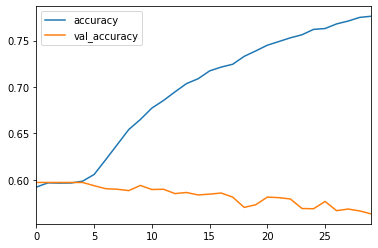

In [145]:
losses[['accuracy','val_accuracy']].plot()

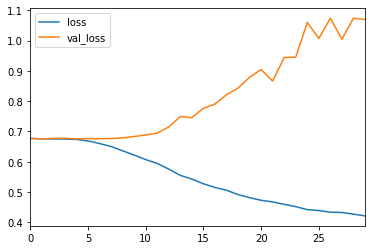

In [146]:
losses[['loss','val_loss']].plot()

In [147]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[1.0694318070598403, 0.56312096]


In [148]:
y_pred = model.predict_classes(X_test)

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.15      0.22      1379
           1       0.60      0.84      0.70      2043

    accuracy                           0.56      3422
   macro avg       0.49      0.50      0.46      3422
weighted avg       0.51      0.56      0.51      3422



In [150]:
accuracy_score(y_test, y_pred)

0.5631209818819404

In [151]:
model.save("models/attainable_vect_nn.h5")

### Label time-bound

In [152]:
time_bound_features = smart_features.drop(columns=['label_specific', 'label_attainable', 'label_unambiguity'])

In [153]:
X = time_bound_features.drop('label_time_bound', axis=1)
y = time_bound_features['label_time_bound']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [155]:
mms = MinMaxScaler()

In [156]:
X_train_scaled = mms.fit_transform(X_train)

In [157]:
X_test_scaled = mms.fit_transform(X_test)

In [158]:
tb_xgb = XGBClassifier()

In [159]:
tb_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
y_pred = tb_xgb.predict(X_test_scaled)

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3825
           1       0.07      0.00      0.01       680

    accuracy                           0.84      4505
   macro avg       0.46      0.50      0.46      4505
weighted avg       0.73      0.84      0.78      4505



In [162]:
accuracy_score(y_test, y_pred)

0.8437291897891231

In [163]:
with open('models/time_bound_feat_xgb.pkl', 'wb') as f:
    pickle.dump(tb_xgb, f)

#### Vectors approach

In [164]:
time_bound_vectors = smart_text_vectors.drop(columns=['label_specific', 'label_attainable'])

In [165]:
time_bound_vectors.dropna(inplace=True)

In [166]:
text = time_bound_vectors['goal_name_type_mean_pos']
y = time_bound_vectors['label_time_bound']

In [167]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [169]:
tb_v_xgb = XGBClassifier()

In [170]:
tb_v_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [171]:
y_pred = tb_v_xgb.predict(X_test)

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2892
           1       0.50      0.01      0.02       530

    accuracy                           0.85      3422
   macro avg       0.67      0.50      0.47      3422
weighted avg       0.79      0.85      0.78      3422



In [173]:
accuracy_score(y_test, y_pred)

0.8451198129748685

In [174]:
with open('models/time_bound_vect_xgb.pkl', 'wb') as f:
    pickle.dump(tb_v_xgb, f)

#### Neural net approach

In [175]:
text = time_bound_vectors['goal_name_type_mean_pos']
y = time_bound_vectors['label_time_bound']

In [176]:
token = Tokenizer()
token.fit_on_texts(text)

In [177]:
vocab_size = len(token.word_index) + 1
vocab_size

4948

In [178]:
encoded_text = token.texts_to_sequences(text)

In [179]:
max_len = int()
for i in encoded_text:
    len_ = len(i)
    if len_ > max_len:
        max_len = len_
        
max_len

142

In [180]:
max_length = 142
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [182]:
vec_size = 142

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(64, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [183]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 142, 142)          702616    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 141, 64)           18240     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 70, 64)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 70, 64)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 70, 32)            2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 70, 32)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 70, 32)           

In [184]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Wall time: 30.9 ms


In [185]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test= np.asarray(X_test)
y_test = np.asarray(y_test)

In [186]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [187]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 13684 samples, validate on 3422 samples
Epoch 1/600
13684/13684 [==============================] - 11s 770us/sample - loss: 0.4410 - accuracy: 0.8452 - val_loss: 0.5509 - val_accuracy: 0.8451
Epoch 2/600
13684/13684 [==============================] - 11s 773us/sample - loss: 0.4350 - accuracy: 0.8453 - val_loss: 0.5295 - val_accuracy: 0.8451
Epoch 3/600
13684/13684 [==============================] - 9s 677us/sample - loss: 0.4341 - accuracy: 0.8453 - val_loss: 0.5362 - val_accuracy: 0.8451
Epoch 4/600
13684/13684 [==============================] - 9s 677us/sample - loss: 0.4332 - accuracy: 0.8453 - val_loss: 0.5103 - val_accuracy: 0.8451
Epoch 5/600
13684/13684 [==============================] - 10s 759us/sample - loss: 0.4346 - accuracy: 0.8453 - val_loss: 0.5272 - val_accuracy: 0.8451
Epoch 6/600
13684/13684 [==============================] - 14s 1ms/sample - loss: 0.4320 - accuracy: 0.8453 - val_loss: 0.5176 - val_accuracy: 0.8451
Epoch 7/600
13684/13684 [==================

In [188]:
losses = pd.DataFrame(model.history.history)

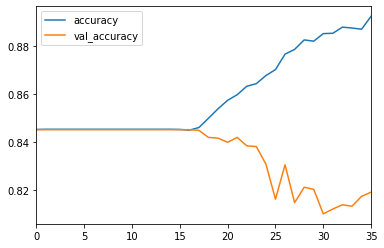

In [189]:
losses[['accuracy','val_accuracy']].plot()

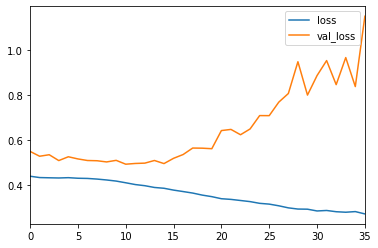

In [190]:
losses[['loss','val_loss']].plot()

In [191]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[1.149331752787829, 0.81911165]


In [192]:
y_pred = model.predict_classes(X_test)

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2892
           1       0.18      0.05      0.07       530

    accuracy                           0.82      3422
   macro avg       0.51      0.50      0.49      3422
weighted avg       0.74      0.82      0.77      3422



In [194]:
accuracy_score(y_test, y_pred)

0.8191116306253653

In [195]:
model.save("models/time_bound_vect_nn.h5")